## Final Report
    
<img src="sba_logo.png" alt="SBA Logo" title="SBA Logo" width="300" height="100" align="right"/>

# <p style="font-size:40px ; color:blue" align="center">Predicting SBA Loan Defaults</p> <sub>By Kaniela Denis - 24 Jan 2022</sub>

<hr style="border:2px solid blue"> </hr>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np

# import functions
import prepare
import modeling
import explore
import stats

import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Agenda

- Overview
- Acquire
- Prepare
- Explore
- Model
- Conclusion

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Overview

## Project Description: 
Loans enable people to achieve their dreams. People need loans to go to college, to own a home, or to start a business. The Small Business Administration gaurantess loan amounts to lenders allowing the government to share the risk of a defaulted loan. The project will explore a data set of SBA backed loans to identify drivers of loan loan default and create a classification model that will predict default.

## Goal: 
Identify Drivers of Defaulted Loans Backed by the Small Business Administration and Build a Classification Model That Will Predict Which Loans will Default

## Results:
Identifed Five Features Drivers and Built a Model that Achieved 93% Percent Accuracy

## Support:
- Data Dictionary and README file is available in my repo
- https://github.com/kanieladenis/individual_project_sba_loans


<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Acquire

- Downloaded CSV from Kaggle https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied
- 899K rows
- Read CSV into DataFrame

In [2]:
# creates dataframe from csv
df = pd.read_csv('SBAnational.csv')

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Prepare

- Renamed 20 Columns for Readability
- Dropped default_date column because too many nulls. Dropped the rest of the nulls. Reduced by 13K rows.
- Rows: 886K
- Found no duplicates or blank spaces
- Removed dollar sign and commos from all money columns
- Changed column data types: 
    - money columns to float
    - date columns to datetime
- Dropped column 'oustanding_gross' since most rows were zero
- Removed outlier for values 2 times IRQ over 1st and 3rd quartile

In [3]:
# run wrangle function which accumulates all prepare functions
df = prepare.wrangle(df)

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Explore

### Split data with a 56%, 24%, 20% portions while stratifying on column 'is_default'

## Questions to Explore:
- Question 1: Are There More Defaulted Loans Than Paid Loans?
- Question 2: What Term Lengths Are Common with Defaulted Loans?
- Question 3: What is the Timeline for Default Loans?
- Question 4: In What Industries do Loan Defaults Occur Most?
- Question 5: In What States do Loan Defaults Occur Most by Percentage of Total Loans?
- Question 6: Are There More Defaults for Businesses with Less Employees and Less Jobs?
- Question 7: Are There More Defaults with Higher Monthly Debt and/or Lower SBA Coverage Percent?

In [4]:
# Creates train, validate, test by spliting df with a 56%, 24%, 20% portions
train, validate, test = modeling.split(df)

## Question 1: Are There More Defaulted Loans Than Paid Loans?

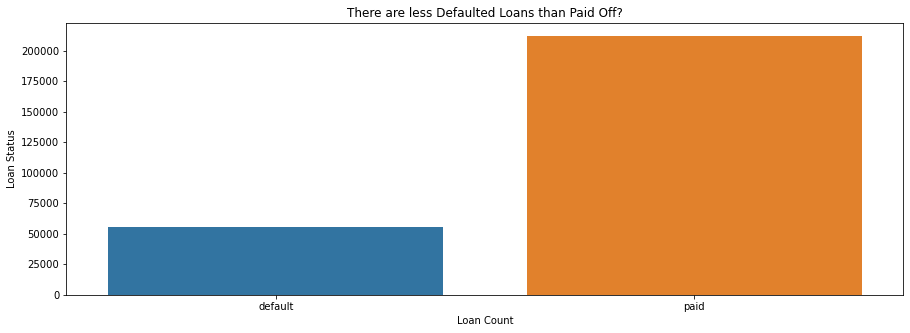

In [5]:
# This function creates a dataframe of loan_status by count and builds a bar plot of loan status
explore.explore_1(train)

### Notes:
- Significantly less defaulted loans than paid loans. 

## Question 2: What Term Lengths Are Common with Defaulted Loans?

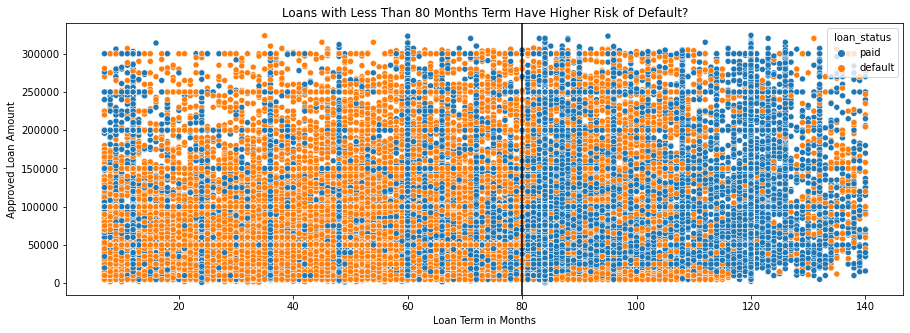

In [6]:
# This function plots loan amount loan term and hue  by loan status
explore.explore_2(train)

### Run Chi2 Test to Determine if Loan Term and Loan Status are Indpendent of Each Other.

In [7]:
# This function run chi2 test to dertermine independence between loan status and loan term
stats.stats_1(train)

Observed

[[ 49628  74135]
 [  5647 137836]]
---
Expected

[[ 25598.13739027  98164.86260973]
 [ 29676.86260973 113806.13739027]]
---

chi^2 = 52968.9869
p     = 0.0000


### Notes:
- Defaults seem to appear most under 80 month term
- Chi2 Test verifies Loan Term and Loan Status are Not Independent of each other

## Question 3: What is the Timeline for Default Loans?

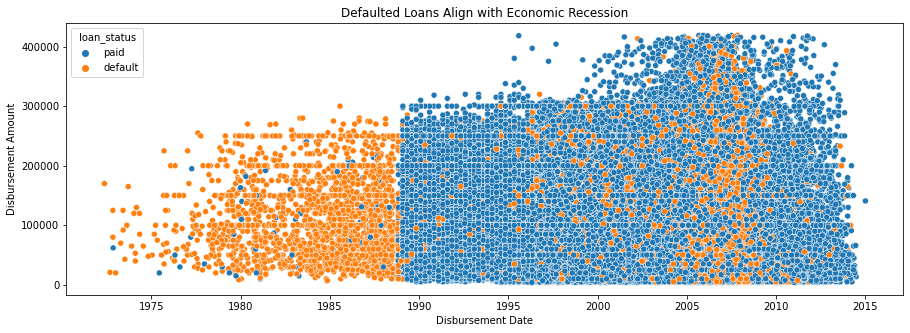

In [8]:
# This function plots loan disbursement date by loan disbursement gross and hue by loan status to see defaults overtime
explore.explore_3(train)

### Notes:
- Spike in defaults around the 2009 recession which had -2.9% GDP Growth. 
- Uknown why majority of loans before 1990 are defaults. Expect data collection error.
- Defaults are not aligned to overall US economy as defaults don't reflec the rececssion in 1990 and 2000 

## Question 4: In What Industries do Loan Defaults Occur Most?

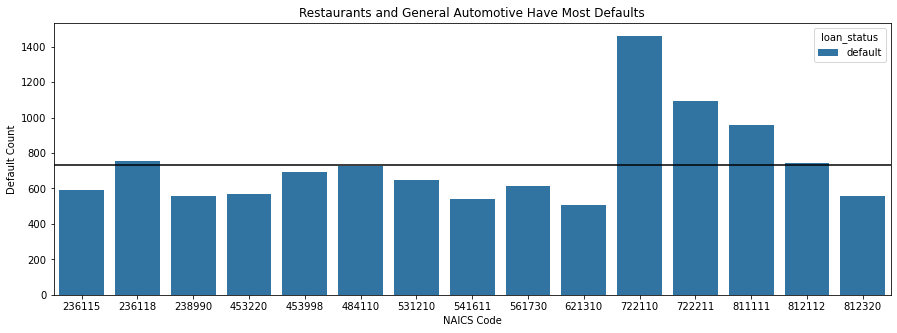

In [9]:
# This function creates a dataframe by groping by naics and loan status to determine loan status counts. It plots the default counts by naics in a bar graph.
explore.explore_4(train)

### Run Chi2 Test to Determine if NAICS and Loan Status are Independent of Each Other

In [10]:
# This functions rusn chi2 test to determine independence between naics and loan status
stats.stats_2(train)

Observed

[[ 5137 47747]
 [    0     7]
 [    0     1]
 ...
 [    0     4]
 [    0     4]
 [    4    14]]
---
Expected

[[1.09380986e+04 4.19459014e+04]
 [1.44782335e+00 5.55217665e+00]
 [2.06831908e-01 7.93168092e-01]
 ...
 [8.27327631e-01 3.17267237e+00]
 [8.27327631e-01 3.17267237e+00]
 [3.72297434e+00 1.42770257e+01]]
---

chi^2 = 18055.0168
p     = 0.0000


### Notes:
- Three business section are at above average risk of defaults: Full Restaurant Service, Limited Restaurant Service, and General Automotive
- Chi2 Test verifies that NAICS and loan status are Not Independent of each other

## Question 5: In What States do Loan Defaults Occur Most by Percentage of Total Loans?

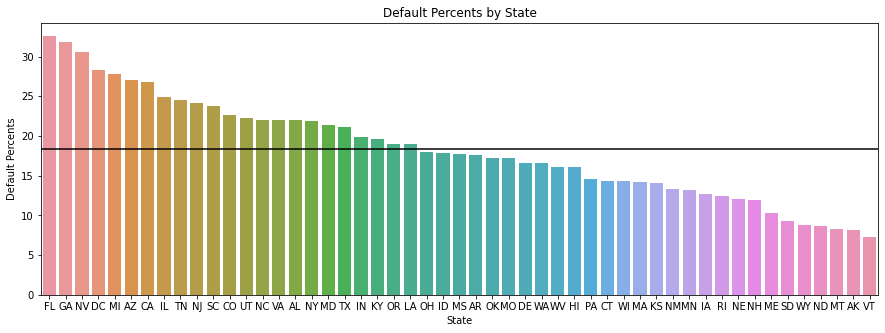

In [11]:
explore.explore_5b(train)

### Run Chi2 Test to Determine if Loan Status and State are Independent of Each Other?

In [12]:
stats.stats_3(train)

Observed

[[   64   717]
 [  477  1696]
 [  367  1713]
 [ 1135  3060]
 [ 8726 23789]
 [ 1261  4324]
 [  569  3386]
 [  146   370]
 [  125   626]
 [ 4077  8432]
 [ 1804  3854]
 [  208  1089]
 [  501  3427]
 [  519  2380]
 [ 2417  7315]
 [  762  3065]
 [  539  3289]
 [  491  2007]
 [  575  2456]
 [ 1253  7561]
 [  953  3502]
 [  184  1607]
 [ 1690  4385]
 [  901  5900]
 [ 1143  5490]
 [  412  1920]
 [  221  2452]
 [  978  3468]
 [  147  1563]
 [  250  1832]
 [  466  3457]
 [ 1754  5494]
 [  237  1549]
 [  634  1441]
 [ 4395 15638]
 [ 1794  8175]
 [  519  2493]
 [  621  2642]
 [ 1705  9980]
 [  396  2775]
 [  379  1218]
 [  131  1278]
 [  668  2062]
 [ 4262 15861]
 [ 1202  4189]
 [  851  3019]
 [  120  1533]
 [ 1198  6034]
 [  800  4803]
 [  178   925]
 [   70   730]]
---
Expected

[[  161.5357199    619.4642801 ]
 [  449.44573539  1723.55426461]
 [  430.21036798  1649.78963202]
 [  867.65985272  3327.34014728]
 [ 6725.13947823 25789.86052177]
 [ 1155.1562044   4429.8437956 ]
 [  818.0201

### Notes:
- 24 States Above Avg: FL, GA, NV, AZ, MI, CA, DC, IL, NJ, TN, SC, CO, UT, NC, NY, VA, TX, AL, IN, MD, LA, KY, OR, OH
- Chi2 Test verifies that Loan Status and State Not Indpendent of each other

## Question 6: Are There More Defaults for Businesses with Less Employees and Less Jobs?

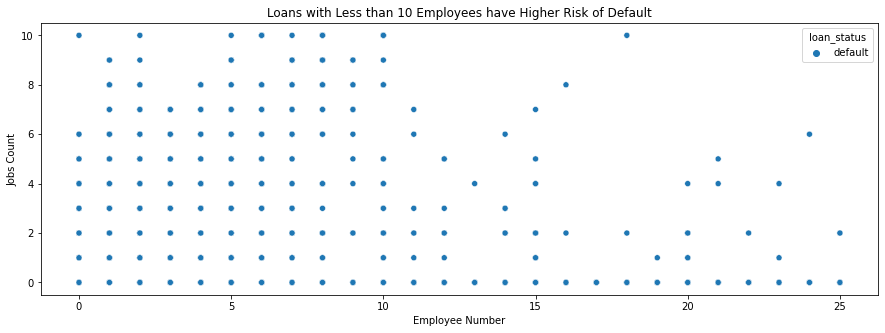

In [13]:
explore.explore_6(train)

### Run Chi2 Test to Determine if Loan Status and Employee Number are Independent of Each Other

In [14]:
stats.stats_4(train)

Observed

[[  1950  17580]
 [ 53325 194391]]
---
Expected

[[  4039.427157  15490.572843]
 [ 51235.572843 196480.427157]]
---

chi^2 = 1469.3279
p     = 0.0000


### Notes:
- Most Defaults occur with loans that have 10 or less employees
- Chi2 test verifies that employ number and loan status are Not Indendent of each other

## Question 7: Are There More Defaults with Higher Monthly Debt and/or Lower SBA Coverage Percent?

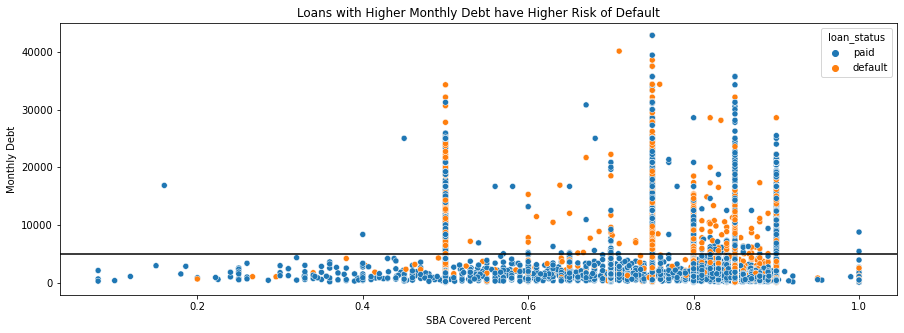

In [15]:
explore.explore_7(train)

### Notes:
- Most defaults seem to be above 5K monthly debt
- SBA Covered percentage doesn't seem to indicate any differences

## Exploration Summary:
### Following features are connected to increased defaults:
- Term: 80 months or less
- NAICS: Restaurant and General Automotive
- State: Half the states but top 3 are Florida, Georgia, Nevada
- Employee Number: 10 or less
- Monthly Debt: $5,000 or more

## Based on Exploration, add feature engineeered columns:
- NAICS Defaulter: Any row that is one of the three business sections are marked with a 1, all others are 0
- State Defaulter: Any row that is one of the 24 states that are above average defaulters by percentage are marked with a 1 and all others are 0

In [16]:
# Add feature engineered columns to train, validate, test data sets
train, validate, test = modeling.feature_engineering(train, validate, test)

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Model

## Pre_Processing:
### Create X and y versions of Train, Validate, and Test

In [17]:
# creates X, y versions for train, validate, test data sets
X_train, y_train, X_validate, y_validate, X_test, y_test = modeling.X_y(train, validate, test)

### Scale X_versions of Train, Validate, and Test

In [18]:
# scales selcted columns in X_train, X_validate, X_test
X_train_scaled, X_validate_scaled, X_test_scaled = modeling.scale(X_train, X_validate, X_test)

## Use Select K Best to Identify the Best 3 Features

In [19]:
# Uses Select K Best for choose 3 best features
f_feature = modeling.select_k_best(X_train_scaled, y_train)
f_feature

['term', 'jobs_retained', 'jobs_count']

### Select K Best chose: Term, Jobs Retained, and Jobs Count

## Use Recursive Feature Elimination (RFE) to Identify the Best 3 Features

In [20]:
# Uses Recursive Feature Engineering to choose 3 best features
rfe_feature = modeling.rfe(X_train_scaled, y_train)
rfe_feature

['term', 'sba_appv_amount', 'monthly_debt']

### RFE chose Term , SBA Approved Amount, and Monthly Debt

## Going Forward with Modeling with Combination of Select K Best and RFE
- Term
- Jobs Retained
- Jobs Count
- SBA Appoved Amount
- Monthly Debt

### Not using other features:
- Not Selected during Feature Selection
- Data Leak: Default Amount, Disbursement Amount
- Not helpful at this time

## Modeling

## Baseline Model
- Used most common value which is paid (is_default == 0)

In [21]:
# find mode of y_train to set for baseline
y_train.mode()

,is_default
0,0


In [22]:
# Create Baseline by setting all values to zero
(y_train.is_default == 0).mean()

0.7931680923194361

### Baseline Model Accuracy is 79% 

## Model 1: Decison Tree on Train

In [23]:
# Uses Decision Tree to create Model1 on Train and builds classification report
clf = modeling.dt_train(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    211971
           1       0.67      0.52      0.59     55275

    accuracy                           0.85    267246
   macro avg       0.78      0.73      0.75    267246
weighted avg       0.84      0.85      0.84    267246



### Model 1 Accuracy on Train is 85%

## Using Model 1 on Validate

In [24]:
# Uses Decision Tree to make Model 1 on Validate and builds a Classification Report
modeling.dt_validate(X_validate_scaled, y_validate, clf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     90845
           1       0.67      0.52      0.58     23689

    accuracy                           0.85    114534
   macro avg       0.77      0.72      0.74    114534
weighted avg       0.84      0.85      0.84    114534



### Model 1 Accuracy on Validate is 85%, not over/under fit

## Model 2: Random Forest on Train

In [25]:
# Uses Randon Forest to make Model 2 on Train and builds a Classfication Report
rf = modeling.rf_train(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91    211971
           1       0.80      0.31      0.45     55275

    accuracy                           0.84    267246
   macro avg       0.82      0.65      0.68    267246
weighted avg       0.84      0.84      0.81    267246



### Model 2 Accuracy on Train is 84%

## Model 2 on Validate

In [26]:
# Uses Random Forest for Model 2 on Validate and builds a Classification Report
modeling.rf_validate(X_validate_scaled, y_validate, rf)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     90845
           1       0.80      0.31      0.44     23689

    accuracy                           0.84    114534
   macro avg       0.82      0.64      0.67    114534
weighted avg       0.83      0.84      0.81    114534



### Model 2 Accuracy on Validate is 84%, not over/under fit

## Model 3: K-Nearest Neighbor on Train

In [27]:
# Uses K_Nearest Neighbor (KNN) for Model 3 on Train and builds a Classification Report
knn = modeling.knn_train(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    211971
           1       0.87      0.78      0.82     55275

    accuracy                           0.93    267246
   macro avg       0.91      0.87      0.89    267246
weighted avg       0.93      0.93      0.93    267246



### Model 3 Accuracy on Train is  93%

## Model 3 on Validate

In [28]:
# Uses K-Nearest Neighbor for Model 3 on Validate and builds a Classification Report
modeling.knn_validate(X_validate_scaled, y_validate, knn)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     90845
           1       0.77      0.66      0.71     23689

    accuracy                           0.89    114534
   macro avg       0.84      0.80      0.82    114534
weighted avg       0.88      0.89      0.88    114534



### Model 3 Accuracy on Validate is 89%, not over/under fit

In [29]:
# Uses K-Nearest Neighbor for Model 3 on Test and builds a Classfication Report
modeling.knn_test(X_test_scaled, y_test, knn)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     75705
           1       0.77      0.66      0.71     19741

    accuracy                           0.89     95446
   macro avg       0.84      0.81      0.82     95446
weighted avg       0.89      0.89      0.89     95446



## Use Model 3 on Test

In [30]:
# This function makes a knn prediction on test data and builds a report
modeling.knn_test(X_test_scaled, y_test, knn)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     75705
           1       0.77      0.66      0.71     19741

    accuracy                           0.89     95446
   macro avg       0.84      0.81      0.82     95446
weighted avg       0.89      0.89      0.89     95446



### Model 3 Accuracy on Test is 89%, not over/under fit

## Modeling Summary
- All models beat the baseline of 79%
- Model 3 (K-Nearest Neighbor) received the best accuracy:
    - 93% on Train
    - 89% on Validate
    - 89% on Test
- Expect Model 3 to peform consistently with new data

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Conclusion

## Summary
The goals of this project was to discover drivers of default for SBA back loans and to build a classfication model that will predict if a loan will default.

The goals were reached. I identifed 5 drivers via exploration that indicated increased risk of default. Those drivers are:

    1. Loans with a term of less than 80 months.
    2. Loans in the restaurant and general automotive business
    3. Loans for businesses in 24 states have higher risk of default. The top 3 states are FL, GA, NV
    4. Loans for businesses that have fewer than 10 employees

I tested each variable with Chi2 and confirmed all were groups were linked to defaults. After Feature Engineering two additional variables, I used all capable features for Feature Selection with Select K Best and Recursive Feature Elimination. I went forward with the following five features:

    1. Term
    2. Jobs Retained
    3. Jobs Count
    4. SBA Appoved Amount
    5. Monthly Debt

I built 3 classification models using Decision Tree, Random Forest, and K-Nearest Neighbor. All three models performed above baseline with K-Nearest Neighbor peforming the best with a 93% accuracy on Train, 89% accuracy on Validate, and 89% accuracy on Test. K-Nearest Neighbor performed the best, is not under or overfit, and will work on new data
## Recommendations
Recommend model for next phase of testing and to be considered for operational implementation

## Next Steps
With more time, I would engineer more feature from the categorical varibables and find better time line data that can overlap with general economic data.